# Chapter xx

*Data Structures and Information Retrieval in Python*

Copyright 2021 Allen Downey

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [1]:
from collections import Counter

## Counter

A `Counter` is a map from values to their frequencies.
Here are the examples from [the documentation](https://docs.python.org/3/library/collections.html#collections.Counter).

In [2]:
Counter()                           # a new, empty counter

Counter()

In [3]:
Counter('gallahad')                 # a new counter from an iterable

Counter({'g': 1, 'a': 3, 'l': 2, 'h': 1, 'd': 1})

In [4]:
Counter({'red': 4, 'blue': 2})      # a new counter from a mapping

Counter({'red': 4, 'blue': 2})

In [5]:
c = Counter(cats=4, dogs=8)             # a new counter from keyword args
c

Counter({'cats': 4, 'dogs': 8})

In [6]:
c['cats']

4

In [7]:
c['hamsters']

0

In [8]:
c.keys()

dict_keys(['cats', 'dogs'])

In [9]:
c.values()

dict_values([4, 8])

In [10]:
c.elements()

In [11]:
for element in c.elements():
    print(element, end=' ')

cats cats cats cats dogs dogs dogs dogs dogs dogs dogs dogs 

In [12]:
c.most_common()

[('dogs', 8), ('cats', 4)]

If two words are anagrams, they yield equal Counters, so you can use Counters to test anagrams in linear time.

In [13]:
def is_anagram(word1, word2):
    """Checks whether the words are anagrams.

    word1: string
    word2: string

    returns: boolean
    """
    return Counter(word1) == Counter(word2)

In [14]:
is_anagram('tachymetric', 'mccarthyite')

True

In [15]:
is_anagram('banana', 'peach')

False

## Multiset

A Counter is a natural representation of a multiset, which is a set where the elements can appear more than once.

In [16]:
c = Counter(a=3, b=1)
d = Counter(a=1, b=2)

In [17]:
c + d                       # add two counters together:  c[x] + d[x]

Counter({'a': 4, 'b': 3})

In [18]:
c - d                       # subtract (keeping only positive counts)

Counter({'a': 2})

In [19]:
c & d                       # intersection:  min(c[x], d[x]) 

Counter({'a': 1, 'b': 1})

In [20]:
c | d                       # union:  max(c[x], d[x])

Counter({'a': 3, 'b': 2})

You could use a multiset in a game like Scrabble to see if a given set of tiles can be used to spell a given word.

In [21]:
def can_spell(word, tiles):
    """Checks whether a set of tiles can spell a word.

    word: string
    tiles: string

    returns: boolean
    """
    diff = Counter(word) - Counter(tiles)
    return len(diff) == 0

In [22]:
can_spell('quijibo', 'biijoqu')    # use all the letters

True

In [23]:
can_spell('team', 'i')             # missing some tiles

False

In [24]:
can_spell('SYZYGY', 'AGSYYYZ')

True

## Probability Mass Functions

A `Counter` is also a natural way to represent a probability mass function (PMF).

`normalize` computes the total of the frequencies and divides through, yielding probabilities that add to 1.

In [25]:
def normalize(counter):
    """Normalizes the PMF so the probabilities add to 1.
    """
    total = sum(counter.values())
    for key in counter:
        counter[key] /= total

As an example, we can make a Pmf object that represents a 6-sided die.

In [26]:
d6 = Counter([1,2,3,4,5,6])
normalize(d6)
d6

Counter({1: 0.16666666666666666,
         2: 0.16666666666666666,
         3: 0.16666666666666666,
         4: 0.16666666666666666,
         5: 0.16666666666666666,
         6: 0.16666666666666666})

In [27]:
import matplotlib.pyplot as plt

def plot_pmf(pmf, **options):
    x, y = list(zip(*pmf.items()))

    plt.bar(x, y, **options)
    plt.xlabel('Outcome')
    plt.ylabel('Probability')

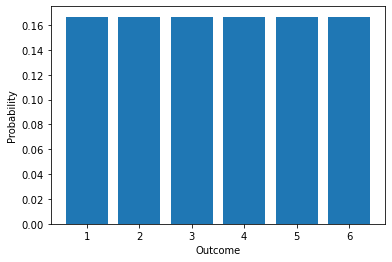

In [28]:
plot_pmf(d6)

Using the `convolve` function, we can compute the distribution for the sum of two dice.

In [29]:
def convolve(c, d):
    """Convolves two distributions.

    The result is the distribution of sums 
    of values from the two distributions.
    """
    pmf = Counter()
    for key1, prob1 in c.items():
        for key2, prob2 in d.items():
            pmf[key1 + key2] += prob1 * prob2
    return pmf

In [30]:
d6_twice = convolve(d6, d6)

for key, prob in d6_twice.items():
    print(key, prob)

2 0.027777777777777776
3 0.05555555555555555
4 0.08333333333333333
5 0.1111111111111111
6 0.1388888888888889
7 0.16666666666666669
8 0.1388888888888889
9 0.1111111111111111
10 0.08333333333333333
11 0.05555555555555555
12 0.027777777777777776


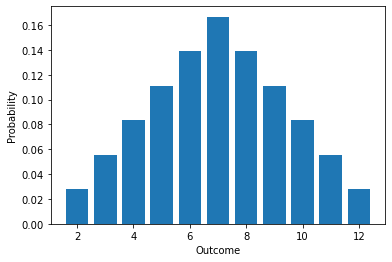

In [31]:
plot_pmf(d6_twice)

## Bayesian Update

We can use a Counter to solve the "Dice Problem," from Chapter 3 of <i>Think Bayes</i>.

> "Suppose I have a box of dice that contains a 4-sided die, a 6-sided die, an 8-sided die, a 12-sided die, and a 20-sided die. If you have ever played Dungeons & Dragons, you know what I am talking about.  Suppose I select a die from the box at random, roll it, and get a 6. What is the probability that I rolled each die?"


In [32]:
hypos = [4, 6, 8, 12, 20]
prior = Counter(hypos)
prior

Counter({4: 1, 6: 1, 8: 1, 12: 1, 20: 1})

In [33]:
normalize(prior)
prior

Counter({4: 0.2, 6: 0.2, 8: 0.2, 12: 0.2, 20: 0.2})

In [34]:
def likelihood(data, hypo):
    outcome = data
    sides = hypo
    
    if outcome > sides:
        return 0
    
    else:
        return 1/sides

In [35]:
likelihood(6, 8)

0.125

In [36]:
likelihood(10, 8)

0

In [37]:
def update(pmf, outcome):
    for hypo in pmf:
        pmf[hypo] *= likelihood(outcome, hypo)
    normalize(pmf)

In [38]:
posterior = prior.copy()
update(posterior, 6)
posterior

Counter({4: 0.0,
         6: 0.3921568627450981,
         8: 0.2941176470588236,
         12: 0.19607843137254904,
         20: 0.11764705882352945})

As expected, the 4-sided die has been eliminated; it now has 0 probability.  The 6-sided die is the most likely, but the 8-sided die is still quite possible.

Now suppose I roll the die again and get an 8.

In [39]:
posterior2 = posterior.copy()
update(posterior2, 8)
posterior2

Counter({4: 0.0,
         6: 0.0,
         8: 0.6232686980609419,
         12: 0.27700831024930744,
         20: 0.09972299168975073})

Now the 6-sided die has been eliminated, the 8-sided die is most likely, and there is less than a 10% chance that I am rolling a 20-sided die.



Word Frequencies
----------------

Next topic: let's look at histograms of words, bigrams and trigrams.

The following function reads lines from a file or URL and splits them into words:

In [40]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/DSIRP/raw/main/pg2591.txt')

In [41]:
def iterate_words(filename):
    """Read lines from a file and split them into words."""
    for line in open(filename):
        for word in line.split():
            yield word.strip()

Here's an example using a book from Project Gutenberg.  `wc` is a histogram of word counts:

In [42]:
# FAIRY TALES
# By The Brothers Grimm
# http://www.gutenberg.org/cache/epub/2591/pg2591.txt'
wc = Counter(iterate_words('pg2591.txt'))

Here are the 20 most common words:

In [43]:
wc.most_common(20)

[('the', 6507),
 ('and', 5250),
 ('to', 2707),
 ('a', 1932),
 ('he', 1817),
 ('of', 1450),
 ('was', 1337),
 ('in', 1080),
 ('she', 1049),
 ('that', 1021),
 ('his', 1014),
 ('you', 941),
 ('it', 881),
 ('her', 880),
 ('had', 827),
 ('I', 755),
 ('they', 751),
 ('for', 721),
 ('with', 720),
 ('as', 718)]

Word frequencies in natural languages follow a predictable pattern called Zipf's law (which is an instance of Stigler's law, which is also an instance of Stigler's law).

We can see the pattern by lining up the words in descending order of frequency and plotting their ranks (1st, 2nd, 3rd, ...) versus counts (6507, 5250, 2707):

In [44]:
ranks, counts = zip(*enumerate(sorted(wc.values(), reverse=True)))

Text(0, 0.5, 'count')

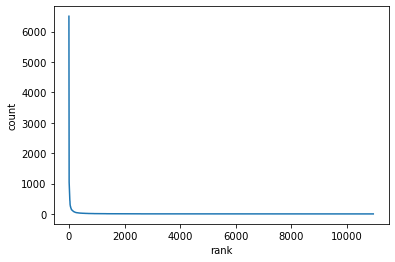

In [45]:
plt.plot(ranks, counts)
plt.xlabel('rank')
plt.ylabel('count')

Huh.  Maybe that's not so clear after all.  The problem is that the counts drop off very quickly.  If we use the highest count to scale the figure, most of the other counts are indistinguishable from zero.

Also, there are more than 10,000 words, but most of them appear only a few times, so we are wasting most of the space in the figure in a regime where nothing is happening.

This kind of thing happens a lot.  A common way to deal with it is to compute the log of the quantities or to plot them on a log scale:

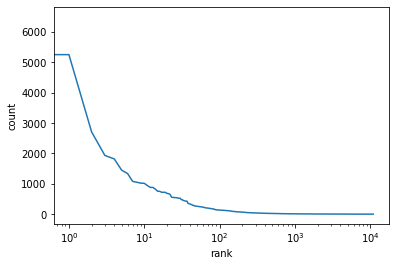

In [46]:
plt.plot(ranks, counts)
plt.xlabel('rank')
plt.ylabel('count')
plt.xscale('log')

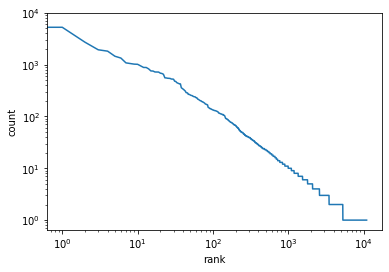

In [47]:
plt.plot(ranks, counts)
plt.xlabel('rank')
plt.ylabel('count')
plt.xscale('log')
plt.yscale('log')

This (approximately) straight line is characteristic of Zipf's law.

## n-grams


On to the next topic: bigrams and trigrams.

In [48]:
from itertools import tee

def pairwise(iterator):
    """Iterates through a sequence in overlapping pairs.
    
    If the sequence is 1, 2, 3, the result is (1, 2), (2, 3), (3, 4), etc.
    """
    a, b = tee(iterator)
    next(b, None)
    return zip(a, b)

`bigrams` is the histogram of word pairs:

In [49]:
bigrams = Counter(pairwise(iterate_words('pg2591.txt')))

And here are the 20 most common:

In [50]:
bigrams.most_common(20)

[(('to', 'the'), 444),
 (('in', 'the'), 399),
 (('of', 'the'), 369),
 (('and', 'the'), 349),
 (('into', 'the'), 294),
 (('said', 'the'), 251),
 (('on', 'the'), 199),
 (('and', 'when'), 168),
 (('he', 'had'), 164),
 (('he', 'was'), 164),
 (('to', 'be'), 163),
 (('it', 'was'), 152),
 (('Then', 'the'), 151),
 (('I', 'will'), 149),
 (('that', 'he'), 143),
 (('at', 'the'), 142),
 (('came', 'to'), 138),
 (('and', 'he'), 135),
 (('she', 'was'), 129),
 (('all', 'the'), 125)]

Similarly, we can iterate the trigrams:

In [51]:
def triplewise(iterator):
    a, b, c = tee(iterator, 3)
    next(b)
    next(c)
    next(c)
    return zip(a, b, c)

And make a Counter:

In [52]:
trigrams = Counter(triplewise(iterate_words('pg2591.txt')))

Here are the 20 most common:

In [53]:
trigrams.most_common(20)

[(('came', 'to', 'the'), 65),
 (('and', 'when', 'he'), 50),
 (('out', 'of', 'the'), 50),
 (('said', 'to', 'the'), 34),
 (('he', 'came', 'to'), 33),
 (('and', 'when', 'she'), 33),
 (('went', 'into', 'the'), 32),
 (('went', 'to', 'the'), 31),
 (('and', 'said', 'to'), 31),
 (('one', 'of', 'the'), 30),
 (('came', 'to', 'a'), 30),
 (('and', 'as', 'he'), 29),
 (('they', 'came', 'to'), 29),
 (('he', 'did', 'not'), 28),
 (('there', 'was', 'a'), 28),
 (('that', 'he', 'had'), 28),
 (('and', 'I', 'will'), 27),
 (('that', 'it', 'was'), 25),
 (('and', 'at', 'last'), 24),
 (('and', 'when', 'the'), 24)]

And now for a little fun.  I'll make a dictionary that maps from each word pair to a Counter of the words that can follow.

In [54]:
from collections import defaultdict

d = defaultdict(Counter)
for a, b, c in trigrams:
    d[a, b][c] += trigrams[a, b, c]

Now we can look up a pair and see what might come next:

In [55]:
d['the', 'blood']

Counter({'ran': 2,
         'on': 1,
         'of': 2,
         'that': 1,
         'came,': 1,
         'streamed': 1,
         'fell': 1,
         'might': 1,
         'ran.': 1})

Here are the most common words that follow "into the":

In [56]:
d['into', 'the'].most_common(10)

[('forest', 15),
 ('forest,', 13),
 ('garden', 9),
 ('kitchen,', 8),
 ('cellar', 8),
 ('wide', 7),
 ('room,', 7),
 ('water,', 7),
 ('wood', 6),
 ('kitchen', 6)]

Here are the words that follow "said the":

In [57]:
d['said', 'the'].most_common(10)

[('old', 13),
 ('man,', 12),
 ('little', 10),
 ('fisherman,', 8),
 ('father,', 7),
 ('ass,', 6),
 ('other;', 5),
 ('wife,', 5),
 ('fish;', 5),
 ('fish.', 5)]

`Counter` provides `choice`, which chooses a random word with probability proportional to count:

In [58]:
import random

def counter_choice(counter):
    """Chooses a random element."""
    return random.choice(list(counter.elements()))

In [59]:
counter_choice(d['said', 'the'])

'little'

Given a prefix, we can choose a random suffix:

In [60]:
prefix = 'said', 'the'
suffix = counter_choice(d[prefix])
suffix

'fisherman,'

Then we can shift the words and compute the next prefix:

In [61]:
prefix = prefix[1], suffix
prefix

('the', 'fisherman,')

Repeating this process, we can generate random new text that has the same correlation structure between words as the original:

In [62]:
for i in range(100):
    suffix = counter_choice(d[prefix])
    print(suffix, end=' ')
    prefix = prefix[1], suffix

'how can you not come back. 'How does that little plot of land; and there it grew dark, they climbed up the wood, seeking some little matters that are coming on Sunday!' 'Heaven forbid!' said the man, 'for I do with you.' They laid themselves down to the door away, so that they had spent the whole day: but though I lose by it in his dreams at night: 'Boy, make me shudder,' thought he. 'That, too, must be of gold, and I will eat the other.' The good little duck did not know whether or not he could not 

With a prefix of two words, we typically get text that flirts with sensibility.